# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [2]:
library('tidyverse')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
vaccine.data = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')

vaccine.data |> head()

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
# create the df_vacc_rates here

df_vacc_rates = vaccine.data |> 
    filter(mmr >=0) |>
    group_by(state) |>
    summarize(percent_vax = sum(mmr >= 95, na.rm=TRUE)/n())

df_vacc_rates |> head()

state,percent_vax
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  
- Arkansas

In [5]:
df_vacc_rates |> 
    arrange(percent_vax) |>
    head()

state,percent_vax
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.326592518
North Dakota,0.455555556
Maine,0.473389356
Minnesota,0.473948525
Ohio,0.491606715


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [6]:
nc_vacc_rates = vaccine.data |>
    filter(state == "North Carolina") |>
    filter(overall >=0) |>
    arrange(overall) |> 
    mutate(n = row_number(),
          fraction_of_schools = n / max(n), 
          percentile = percent_rank(overall))

nc_vacc_rates |> head()

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,n,fraction_of_schools,percentile
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,1,0.0004798464,0.0000000000
2,1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,2,0.0009596929,0.0004800768
3,1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,3,0.0014395393,0.0009601536
4,1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,4,0.0019193858,0.0014402304
5,1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5.0,NA,36.06362,-78.92544,5,0.0023992322,0.0019203072
6,1761,North Carolina,2018-19,Nations Ford Elementary,NA,NA,Mecklenburg,NA,117,-1,45.3,NA,0.9,NA,35.15489,-80.90022,6,0.0028790787,0.0024003841


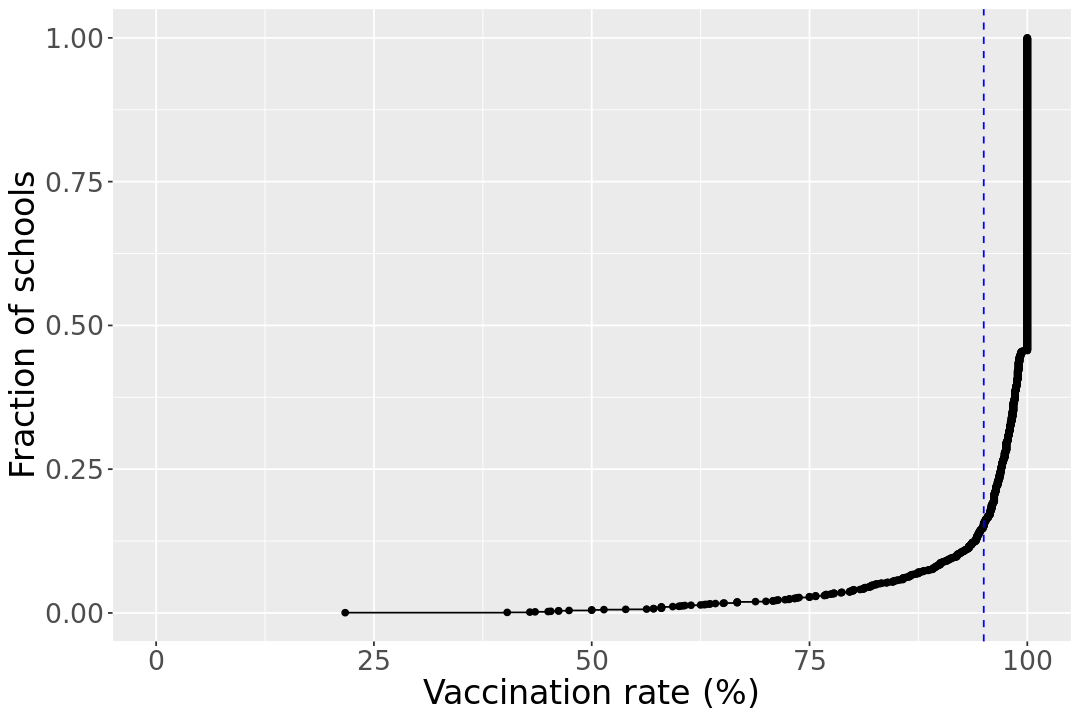

In [7]:
options(repr.plot.width = 9, repr.plot.height = 6)

p = ggplot(nc_vacc_rates, aes(x = overall, y = fraction_of_schools)) +
    geom_point() +
    geom_step() + 
    geom_vline(aes(xintercept = 95), color = 'blue', linetype='dashed') + 
    labs(x = 'Vaccination rate (%)', y = 'Fraction of schools') + 
    theme(text = element_text(size = 20)) + 
    xlim(0,100)

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

- Yes, based on the ecdf plot, the median vaccination rate (x-value when y = 0.50) is nearly 100%